In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('Datasets/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
df = df.drop(['No', 'X1 transaction date', 'X5 latitude', 'X6 longitude'], axis=1)
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1
...,...,...,...,...
409,13.7,4082.01500,0,15.4
410,5.6,90.45606,9,50.0
411,18.8,390.96960,7,40.6
412,8.1,104.81010,5,52.5


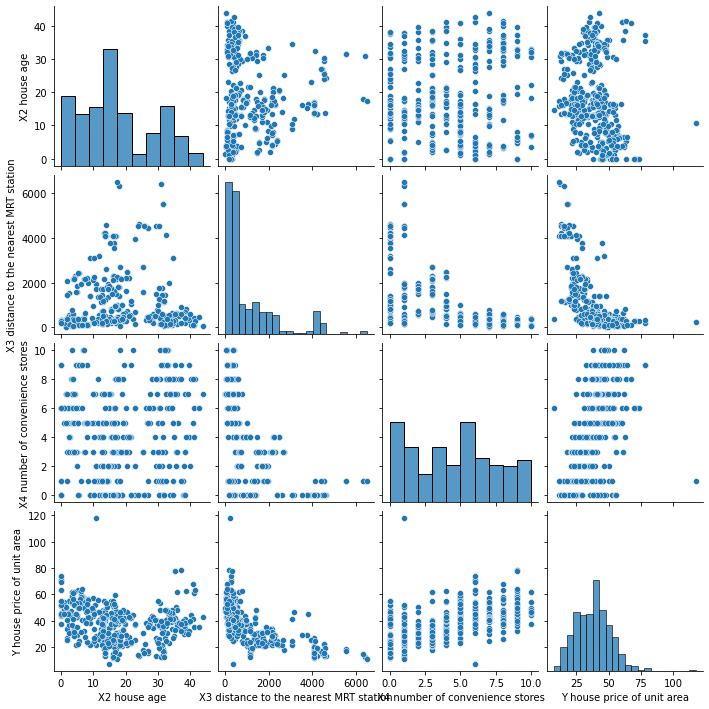

In [6]:
sns.pairplot(df)

In [7]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

regr = linear_model.LinearRegression()

coeffprint = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]

x = np.asanyarray(df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']])
y = np.asanyarray(df['Y house price of unit area'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

regr.fit(X_train,y_train)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [-0.22741142 -0.00560386  1.25170065]
Intercept:  43.15575331658923


In [8]:
predictions = regr.predict(X_test)

In [9]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.32527743713616
MSE: 75.58570700589281
RMSE: 8.694004083613764


c:\Users\Jegadit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

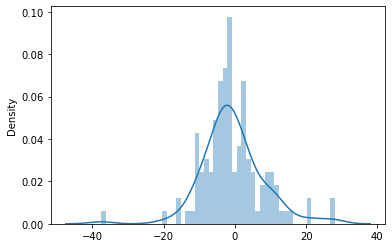

In [10]:
sns.distplot((y_test-predictions),bins=50)

In [12]:
coeffecients = pd.DataFrame(regr.coef_,coeffprint.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
X2 house age,-0.227411
X3 distance to the nearest MRT station,-0.005604
X4 number of convenience stores,1.251701
